In [8]:
import pandas as pd

In [9]:
dataset=pd.read_csv("feetlifting.csv")
dataset.keys()

Index(['class', 'x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2', 'x3',
       ...
       'z31', 'v31', 'x32', 'y32', 'z32', 'v32', 'x33', 'y33', 'z33', 'v33'],
      dtype='object', length=133)

In [10]:
X=dataset.drop(['class'],axis=1)
y=dataset[['class']]
X.shape

(1971, 132)

In [11]:
df2 = len(dataset[dataset["class"]=="feet_lift"])
df2

524

In [12]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(1971, 10)

In [13]:
X_pca

array([[-0.46842144, -1.02438603,  0.79156459, ..., -0.36231498,
         0.29124758, -0.0938328 ],
       [ 0.64765595, -1.27816034,  0.60799345, ...,  0.15875127,
         0.02908099, -0.18186925],
       [ 1.10407366, -1.22641729,  0.82573308, ..., -0.01092096,
        -0.00853926, -0.16925106],
       ...,
       [ 1.40267034, -0.25775716,  0.65746357, ...,  0.27030653,
        -0.60808028,  0.34494117],
       [ 1.36725095, -0.2815161 ,  0.70719041, ...,  0.22108775,
        -0.53559631,  0.34756927],
       [ 1.40901327, -0.28617514,  0.99771847, ...,  0.29192291,
        -0.50022034,  0.27987708]])

In [14]:
from sklearn.preprocessing import OrdinalEncoder
y_encoded = OrdinalEncoder().fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y_encoded,test_size=0.2)

In [16]:
import xgboost as xgb

In [19]:
m2_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4, seed=1729)
m2_xgb.fit(X_train, y_train, eval_metric="auc", verbose = False, eval_set=[(X_test, y_test)])

C:\Users\sagar\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [20]:
y_predicted = m2_xgb.predict(X_test)

<module 'matplotlib.pyplot' from 'C:\\Users\\sagar\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

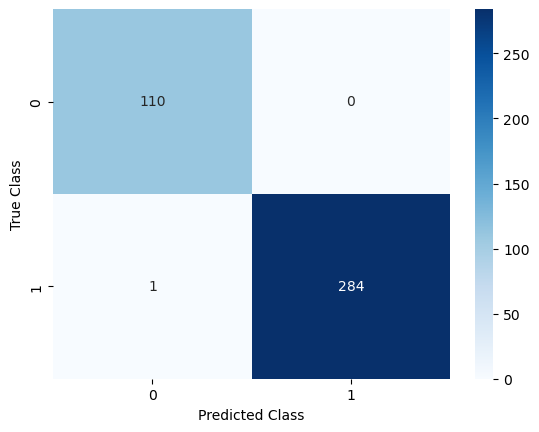

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt

In [37]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time m2_xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

[0]	validation_0-auc:0.97137	validation_0-error:0.05838	validation_1-auc:0.98603	validation_1-error:0.05570
[1]	validation_0-auc:0.98902	validation_0-error:0.02982	validation_1-auc:0.98861	validation_1-error:0.01519
[2]	validation_0-auc:0.99921	validation_0-error:0.02157	validation_1-auc:0.99936	validation_1-error:0.01519
[3]	validation_0-auc:0.99962	validation_0-error:0.01586	validation_1-auc:0.99974	validation_1-error:0.01519
[4]	validation_0-auc:0.99976	validation_0-error:0.01206	validation_1-auc:0.99965	validation_1-error:0.01266
[5]	validation_0-auc:0.99976	validation_0-error:0.00952	validation_1-auc:0.99959	validation_1-error:0.01013
[6]	validation_0-auc:0.99987	validation_0-error:0.00444	validation_1-auc:0.99965	validation_1-error:0.00759
[7]	validation_0-auc:0.99987	validation_0-error:0.00698	validation_1-auc:0.99965	validation_1-error:0.01013
[8]	validation_0-auc:0.99991	validation_0-error:0.00381	validation_1-auc:0.99978	validation_1-error:0.00759
[9]	validation_0-auc:0.99994

C:\Users\sagar\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[54]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[55]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[56]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[57]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[58]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[59]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[60]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[61]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00253
[62]	validation_0-a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [38]:
result = m2_xgb.evals_result()
epochs = len(result['validation_0']['error'])
x_axis = range(0, epochs)

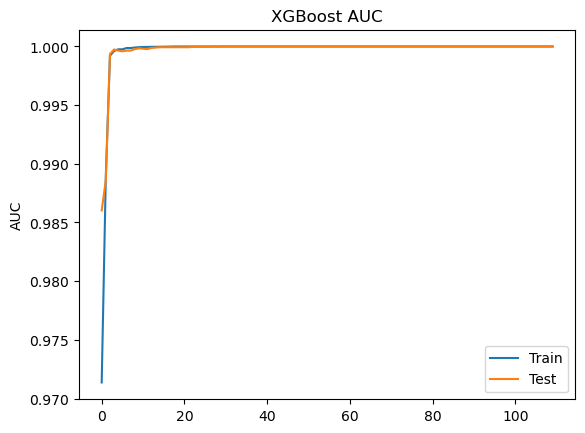

In [39]:
import matplotlib.pyplot as pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, result['validation_0']['auc'], label='Train')
ax.plot(x_axis, result['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

In [40]:
predictions = m2_xgb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9974683544303797

In [42]:
y

,class
0,feet_no_lift
1,feet_no_lift
2,feet_no_lift
3,feet_no_lift
4,feet_no_lift
...,...
1966,feet_no_lift
1967,feet_no_lift
1968,feet_no_lift
1969,feet_no_lift


In [43]:
y_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])